# OpenTURNS

Test.

In [ ]:
import micropip
await micropip.install("openturns", keep_going=True)

In [ ]:
# this cell is just to make testing easier, since the one above has remove input tag
# import micropip
# await micropip.install("openturns", keep_going=True)


# %pip install package_name

In [ ]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt
ot.Log.Show(ot.Log.NONE)

In [ ]:
import numpy as np

x = ot.Normal(4).getSample(6)
print('OpenTurns Sample:\n\n', x)

y = np.array(x)
print('\nOpenTurns Sample converted to numpy array:\n\n', y)

OpenTurns Sample:

     [ X0         X1         X2         X3         ]
0 : [  0.608202  -1.26617   -0.438266   1.20548   ]
1 : [ -2.18139    0.350042  -0.355007   1.43725   ]
2 : [  0.810668   0.793156  -0.470526   0.261018  ]
3 : [ -2.29006   -1.28289   -1.31178   -0.0907838 ]
4 : [  0.995793  -0.139453  -0.560206   0.44549   ]
5 : [  0.322925   0.445785  -1.03808   -0.856712  ]

OpenTurns Sample converted to numpy array:

 [[ 0.60820165 -1.2661731  -0.43826562  1.2054782 ]
 [-2.18138523  0.35004209 -0.35500705  1.43724931]
 [ 0.81066798  0.79315601 -0.4705256   0.26101794]
 [-2.29006198 -1.28288529 -1.31178112 -0.09078383]
 [ 0.99579323 -0.13945282 -0.5602056   0.4454897 ]
 [ 0.32292503  0.4457853  -1.03807659 -0.85671228]]


In [ ]:
sample = ot.Normal(4).getSample(6)
print('OpenTurns Sample:\n\n', sample)

OpenTurns Sample:

     [ X0         X1         X2         X3         ]
0 : [  0.473617  -0.125498   0.351418   1.78236   ]
1 : [  0.0702074 -0.781366  -0.721533  -0.241223  ]
2 : [ -1.78796    0.40136    1.36783    1.00434   ]
3 : [  0.741548  -0.0436123  0.539345   0.29995   ]
4 : [  0.407717  -0.485112  -0.382992  -0.752817  ]
5 : [  0.257926   1.96876   -0.671291   1.85579   ]


It's possible to get one value from a point

In [ ]:
print('The second point in the above point is: {0:.3f}'.format(sample[1][1]))

The second point in the above point is: -0.781


Thus it's also possible to export a point as a list since Samples and Points have list comprehension.

In [ ]:
pythonlist = [value for value in sample[1]]
print(f'The second Point has values: ',*[f'{pythonlist:.3f}' for pythonlist in pythonlist])
print('but now it has type ',type(pythonlist))

The second Point has values:  0.070 -0.781 -0.722 -0.241
but now it has type  <class 'list'>


It's harder to access all points for one of the dimensions from a sample, but fortunately, a Sample has a method asPoint() which gives the values of a 1D sample as a point!

In [ ]:
sampleaspoint = sample[:,0].asPoint()
print('\nValues for the first variable are: ',*[f'{i:.3f}' for i in sampleaspoint])
print('with type ',type(sampleaspoint))


Values for the first variable are:  0.474 0.070 -1.788 0.742 0.408 0.258
with type  <class 'openturns.typ.Point'>


## Example: reliability of a simple slope

This is from Baecher and Christian (2003), also used in Moss (2020).

Simple wedge failure with self-weight balanced by cohesion $c$. Clacluate load as $S=0.25\gamma H$, where $h=10$ m. Distributions are normal, where $\gamma\sim$N($\mu_\gamma=20$ kPa, $\sigma_\gamma=2$ kPa) and $c\sim$N($\mu_c=100$ kPa, $\sigma_c=30$ kPa). 

$Z=R-S=c-0.25\gamma H$

Results: $\beta=1.64$ and $p_f=0.051$.

Start by defining the random variables and plotting the distributions.

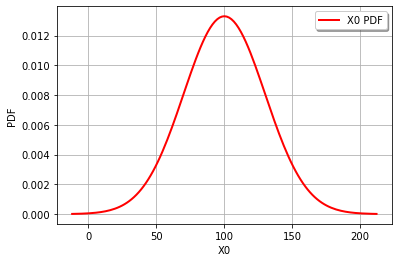

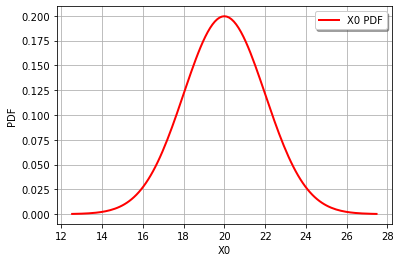

In [ ]:
cohesion = ot.Normal(100,30)
gravity = ot.Normal(20,2)
height = 10

graph = cohesion.drawPDF()
view = viewer.View(graph)
graph = gravity.drawPDF()
view = viewer.View(graph)


It's also easy to draw the CDF or inverse CDF and make a logarithmic axis. [This page][graphs] is a good starting point for formatting hints.

[graphs]: https://openturns.github.io/openturns/master/examples/graphs/graphs_basics.html

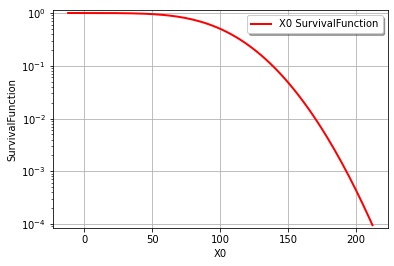

In [ ]:
graph = cohesion.drawSurvivalFunction()
graph.setLogScale(ot.GraphImplementation.LOGY)
view = viewer.View(graph)

It's actually very easy to combine distributions in OT. The distribution for a function of random variables (i.e., theoretically and as an OT distribution class) can be evaluated as if they were normal Python variables for addition, multiplication and division using the distributions or scalar values. Thus, for our example, we can combine the distributions for $R$ and $S$ directly and solve for the reliability index exactly with just 2 lines. *Note: this isn't just limited to normal distributions, OT can do a lot. See [quick start][dist-start] and [distribution manipulation][dist-manip] example pages. See the [transformation page][dist-trans] for a list of functions that can be used to transform distributions (e.g., you can't use $x^2$, but must use `sqr(x)`). These functions are methods in the distribution class.*

[dist-start]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_quick_start_guide_distributions.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-quick-start-guide-distributions-py
[dist-manip]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_distribution_manipulation.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-distribution-manipulation-py
[dist-trans]: http://openturns.github.io/openturns/master/auto_probabilistic_modeling/distributions/plot_distribution_transformation.html#sphx-glr-auto-probabilistic-modeling-distributions-plot-distribution-transformation-py

Z becomes a distribution class:  <class 'openturns.model_copula.Distribution'> 

The reliability index is  1.643989873053573
The failure probability is  0.050089147113134 

The original distribution for c =  Normal(mu = 100, sigma = 30)
The original distribution for g =  Normal(mu = 20, sigma = 2) 

The combined distribution for Z =  Normal(mu = 50, sigma = 30.4138)


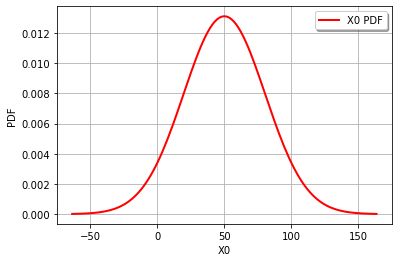

In [ ]:
Z = cohesion - 0.25*gravity*height
print('Z becomes a distribution class: ',type(Z),'\n')

beta = Z.getMean()[0]/Z.getStandardDeviation()[0]
pf = Z.computeCDF(0)

print('The reliability index is ',beta)
print('The failure probability is ',pf,'\n')

print('The original distribution for c = ',cohesion)
print('The original distribution for g = ',gravity,'\n')
print('The combined distribution for Z = ',Z)
graph = Z.drawPDF()
view = viewer.View(graph)

In [ ]:
Z = cohesion - 0.25*gravity*height
print(cohesion, gravity, Z)

Normal(mu = 100, sigma = 30) Normal(mu = 20, sigma = 2) Normal(mu = 50, sigma = 30.4138)


## Example: reliability of a thingamajig

This is from the April 2021 exam for CIE4130 Probababilistic Design, which is looking at the design of a thingamajig.
The limit-state function is $Z=y-x^{0.5}-2$ where $x\sim$N$(\mu_x=4.0,\sigma_x=0.5)$ and $y\sim$N$(\mu_y=5.0,\sigma_y=0.5)$



Z becomes a distribution class:  <class 'openturns.model_copula.Distribution'> 

The reliability index is  1.947161998215974
The failure probability is  0.025680273921256845 , using P[Z<0], whereas
the failure probability is  0.025757658031434517 , using Phi[-beta]

The original distribution for x =  Normal(mu = 4, sigma = 0.5)
The original distribution for y =  Normal(mu = 5, sigma = 0.5) 

The combined distribution for Z =  RandomMixture(-CompositeDistribution=f(Normal(mu = 4, sigma = 0.5)) with f=[x]->[sqrt(x)] + Normal(mu = 3, sigma = 0.5))


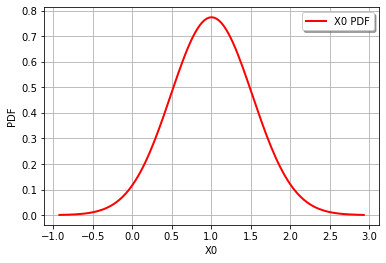

In [ ]:
x = ot.Normal(4.0,0.5)
y = ot.Normal(5.0,0.5)
Z = y - x.sqrt() - 2

print('Z becomes a distribution class: ', type(Z), '\n')

beta = Z.getMean()[0]/Z.getStandardDeviation()[0]
pf = Z.computeCDF(0)
pfN = ot.Normal(0,1).computeCDF(-beta)

print('The reliability index is ', beta)
print('The failure probability is ', pf, ', using P[Z<0], whereas')
print('the failure probability is ', pfN, ', using Phi[-beta]\n')

print('The original distribution for x = ', x)
print('The original distribution for y = ', y, '\n')
print('The combined distribution for Z = ', Z)
graph = Z.drawPDF()
view = viewer.View(graph)

## Setting up a function and random vectors

A [random vector][rand-vect] is how a random variable is represented. Each variable has an underlying distribution (or several marginals and a defendence structure). A [`CompositeRandomVector`][rand-compvect] is a function of random variables and is easily defined with the function and `RandomVector` as inputs. There are several options for specifying a function. See the [quick-start guide][fxn-start] and other short exmaples described [here][fxn].

[rand-vect]: https://openturns.github.io/openturns/master/auto_probabilistic_modeling/random_vectors/plot_random_vector_manipulation.html?highlight=random%20vector
[rand-compvect]: https://openturns.github.io/openturns/master/auto_probabilistic_modeling/random_vectors/plot_composite_random_vector.html?highlight=random%20vector
[fxn]: https://openturns.github.io/openturns/master/auto_functional_modeling/index.html#vectorial-functions
[fxn-start]: https://openturns.github.io/openturns/master/auto_functional_modeling/vectorial_functions/plot_quick_start_functions.html#sphx-glr-auto-functional-modeling-vectorial-functions-plot-quick-start-functions-py

### Overview functions

[PythonFunction][fxn-class] is a class in OT which is defined as follows"
```
PythonFunction(nbInputs, nbOutputs, myPythonFunc)
```

where
* `nbInputs`: the number of inputs,
* `nbOutputs`: the number of outputs,
* `myPythonFunc`: a Python function.

Input and outputs are 'vectors' (i.e., 1D objects), but inputs are restricted to the OT Point class: `y = myPythonFunc(x)`, thus
```
def myPythonFunc(x):
    [...]
    return y
```
Vectorizing the function allows all the points in a sample to be evaluated without making a for loop, but requires conversion to a numpy array. *Note: it's possible to convert all points for each random variable to lists, but I'm not sure if this is more computationally efficient than converting to a numpy array.*
```
import numpy as np

def myPythonFunc(x):
    x = np.array(x)
    x0 = x[:, 0]
    x1 = x[:, 1]
    
    y0 = mysubfunction1(x0, x1)
    y1 = mysubfunction2(x0, x1)
    
    y = np.vstack(y0, y1)
    
    return y
```

To call a vectorized function, the following `func_sample` option must be set:
```
myfunction = PythonFunction(nbInputs, nbOutputs, func_sample = mySimulator)
```

Symbolic functions can be used to speed up performance and allow derivatives to be computed exactly. The function is defined as follows, with inputs and formulas given as a list of strings:
```
myfunction = SymbolicFunction(list_of_inputs, list_of_formulas)
```

[fxn-class]: https://openturns.github.io/openturns/master/user_manual/_generated/openturns.PythonFunction.html

### Python function and vectorized Python function example

First a Python function. A few notes to remember:
* vectorize input, vector out
* can speed up calculations by allowing the function to take a Sample
* Samples can only handle addition and multiplication, otherwise need numpy (thus only vectorize if calculation is worth the overhead of numpy array conversion; see `myLSF2`)
* for vectorized functions, use the following option to enable evaluation with a sample, as opposed to a point: `func_sample = myfun`


Running the two functions below took longer for the vectorized one. Probably because the vector needed to be converted to array and saved.

In [ ]:
import time
import numpy as np

# define marginals
x = ot.Normal(4.0, 0.5)
y = ot.Normal(5.0, 0.5)

# multivariate distribution (with independent marginals)
inputDistribution = ot.ComposedDistribution((x, y))
# random vector for generating realizations
inputRandomVector = ot.RandomVector(inputDistribution)

# define the limit-state function
def myLSF(x):
    Z = x[1] - x[0]**0.5 - 2
    y = [Z]
    return y

# create the function of random variables
myfunction = ot.PythonFunction(2, 1, myLSF)
outputvector = ot.CompositeRandomVector(myfunction, inputRandomVector)

# sample
montecarlosize = 10000
t1 = time.time()
outputSample = outputvector.getSample(montecarlosize)
t2 = time.time()

print('Sample mean = ', outputSample.computeMean()[0])
print('Sample stdv = ', outputSample.computeStandardDeviation()[0, 0])
print('calculation took ', t2-t1, ' seconds')

# now create a vectorized function, which requires numpy arrays
def myLSF2(x):
    x = np.array(x)
    Z = x[:, 1] - x[:, 0]**0.5 - 2
    y = np.vstack(Z)
    return y

# create the vectorized Python function using the func_sample option
myfunctionVect = ot.PythonFunction(2, 1, func_sample = myLSF2)
#it is easy to enable the history, but expensive for computation time
#myfunction = ot.MemoizeFunction(myfunction)
outputvector2 = ot.CompositeRandomVector(myfunctionVect, inputRandomVector)

#sample
t1 = time.time()
outputSample2 = outputvector2.getSample(montecarlosize)
t2 = time.time()

print('Sample mean = ', outputSample2.computeMean()[0])
print('Sample stdv = ', outputSample2.computeStandardDeviation()[0, 0])
print('calculation took ', t2 - t1, ' seconds')
# note the way std dev was accessed - as a matrix!

Sample mean =  1.0144595929476583
Sample stdv =  0.524804927305712
calculation took  0.059850454330444336  seconds
Sample mean =  1.0124297386094485
Sample stdv =  0.5211331101231553
calculation took  0.03390836715698242  seconds
